In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
datos = pd.read_csv('beisbol.csv')

In [7]:
print(datos.columns)

Index(['id', 'equipos', 'bateos', 'runs'], dtype='object')


In [8]:
# Exploración inicial de los datos
print("Primeras filas del dataset:")
print(datos.head())
print("\nInformación del dataset:")
print(datos.info())
print("\nEstadísticas descriptivas:")
print(datos.describe())

Primeras filas del dataset:
   id  equipos  bateos  runs
0   0    Texas    5659   855
1   1   Boston    5710   875
2   2  Detroit    5563   787
3   3   Kansas    5672   730
4   4      St.    5532   762

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       30 non-null     int64 
 1   equipos  30 non-null     object
 2   bateos   30 non-null     int64 
 3   runs     30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB
None

Estadísticas descriptivas:
              id       bateos        runs
count  30.000000    30.000000   30.000000
mean   14.500000  5523.500000  693.600000
std     8.803408    79.873067   82.479088
min     0.000000  5417.000000  556.000000
25%     7.250000  5448.250000  629.000000
50%    14.500000  5515.500000  705.500000
75%    21.750000  5575.000000  734.000000
max    29.000000  5710.000000

In [9]:
# Limpieza de datos - eliminar filas con valores nulos en las columnas de interés
datos = datos.dropna(subset=['bateos', 'runs'])

In [10]:
# Verificación de valores nulos después de la limpieza
print("\nValores nulos por columna después de limpieza:")
print(datos.isnull().sum())


Valores nulos por columna después de limpieza:
id         0
equipos    0
bateos     0
runs       0
dtype: int64


In [11]:
# Selección de características (usando 'bateos' para predecir 'runs')
X = datos['bateos'].values.reshape(-1,1)  # Variable independiente
y = datos['runs'].values.reshape(-1,1)    # Variable dependiente

In [12]:
# División en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Creación y entrenamiento del modelo
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Predicciones
y_pred = regressor.predict(X_test)

In [15]:
# Evaluación del modelo
print('\n--- Métricas de Evaluación ---')
print('Error cuadrático medio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Raíz del error cuadrático medio (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Coeficiente de determinación R²:', regressor.score(X_test, y_test))


--- Métricas de Evaluación ---
Error cuadrático medio (MSE): 5219.975632116472
Raíz del error cuadrático medio (RMSE): 72.24939883567525
Coeficiente de determinación R²: -0.5174837911123824


In [16]:
# Coeficientes del modelo
print('\n--- Parámetros del Modelo ---')
print('Intercepto (b):', regressor.intercept_)
print('Pendiente (m):', regressor.coef_)


--- Parámetros del Modelo ---
Intercepto (b): [-2981.51721258]
Pendiente (m): [[0.66685087]]


In [17]:
# Interpretación del modelo
print('\n--- Interpretación ---')
print(f"Ecuación del modelo: runs = {regressor.intercept_[0]:.2f} + {regressor.coef_[0][0]:.4f} * bateos")
print(f"Por cada 100 bateos adicionales, se esperan {100 * regressor.coef_[0][0]:.2f} runs adicionales")


--- Interpretación ---
Ecuación del modelo: runs = -2981.52 + 0.6669 * bateos
Por cada 100 bateos adicionales, se esperan 66.69 runs adicionales


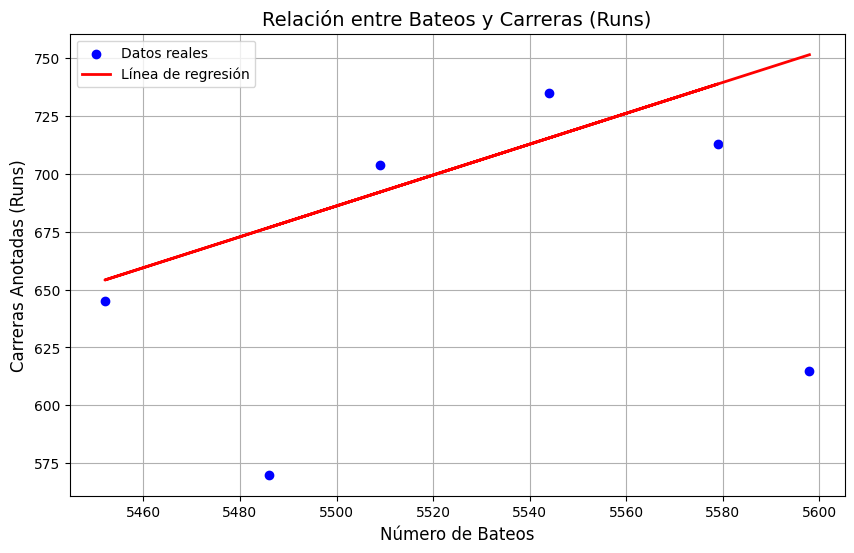

In [18]:
# Visualización de resultados
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.title('Relación entre Bateos y Carreras (Runs)', fontsize=14)
plt.xlabel('Número de Bateos', fontsize=12)
plt.ylabel('Carreras Anotadas (Runs)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

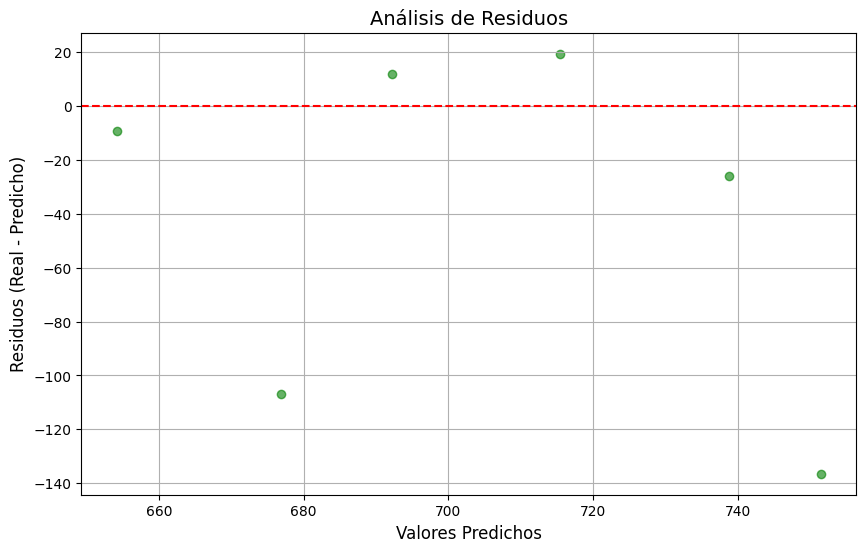

In [19]:
# Análisis de residuos
residuos = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuos, color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Análisis de Residuos', fontsize=14)
plt.xlabel('Valores Predichos', fontsize=12)
plt.ylabel('Residuos (Real - Predicho)', fontsize=12)
plt.grid(True)
plt.show()

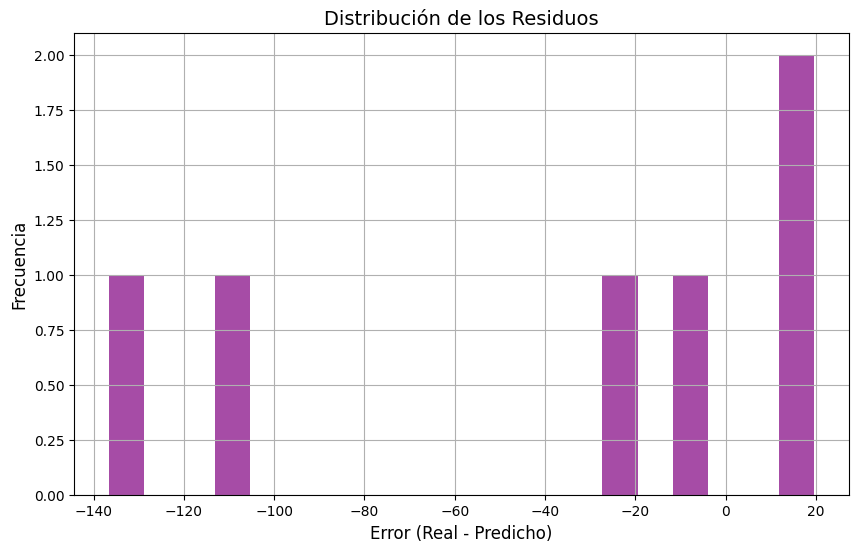

In [20]:
# Visualización adicional: Distribución de los residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=20, color='purple', alpha=0.7)
plt.title('Distribución de los Residuos', fontsize=14)
plt.xlabel('Error (Real - Predicho)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()